In [1]:
import warnings
import scipy as sp
import numpy as np
import porespy as ps
import openpnm as op
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
import skimage as ski

imageSize = 250

primaryImage = np.load('subBeadPackPy250_justSpheres.npy')
secondaryImage = np.load('finalSimFile3D250.npy')

velSecondaryMat = sio.loadmat('velNormSecondary.mat')
velDataNormSecondary = velSecondaryMat['velNorm']

velPrimaryMat = sio.loadmat('velNormPrimary.mat')
velDataNormPrimary = velPrimaryMat['velNorm']

resolution = 16.81E-6 # adding resolution in meters

# Extract pore network information

In [2]:
snowFiltSecondary = ps.filters.snow_partitioning(im=secondaryImage,r_max=4,sigma=0.4, return_all=True)
poreInfoSecondary = ps.networks.regions_to_network(snowFiltSecondary.regions, dt=snowFiltSecondary.dt)


------------------------------------------------------------
Beginning SNOW Algorithm
Converting supplied image (im) to boolean
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  1436
Peaks after trimming saddle points:  951
Peaks after trimming nearby peaks:  938
------------------------------------------------------------
Extracting pore and throat information from image
100%|████████████████████████████████████████████████████████████████████████████████| 938/938 [00:09<00:00, 97.73it/s]


In [3]:
snowFiltPrimary = ps.filters.snow_partitioning(im=primaryImage,r_max=4,sigma=0.4, return_all=True)
poreInfoPrimary = ps.networks.regions_to_network(snowFiltPrimary.regions, dt=snowFiltPrimary.dt)

------------------------------------------------------------
Beginning SNOW Algorithm
Converting supplied image (im) to boolean
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  113
Peaks after trimming saddle points:  104
Peaks after trimming nearby peaks:  93
------------------------------------------------------------
Extracting pore and throat information from image
100%|██████████████████████████████████████████████████████████████████████████████████| 93/93 [00:05<00:00, 18.10it/s]


# Plot velocities for one pore


In [4]:
allRegions = snowFiltPrimary.regions
poreRegion = primaryImage[snowFiltPrimary.regions == 3]

In [13]:
regionLabel = 10
cubeSize = 250
regionImage = np.zeros(np.shape(primaryImage))
regionVelocities = np.zeros(np.shape(primaryImage))
justRegionVel = []

for a in range(0, cubeSize):
    for b in range(0, cubeSize):
        for c in range(0, cubeSize):

            #print(beadPack[a,b,c])
            currentRegion = allRegions[a,b,c]
            if currentRegion == regionLabel:
                regionImage[a,b,c] = 1
                regionVelocities[a,b,c] = velDataNormPrimary[a,b,c]
                justRegionVel.append(velDataNormPrimary[a,b,c])
justRegionVel = np.array(justRegionVel)

In [14]:
test = np.matrix.flatten(regionVelocities)
print(max(test))
print(max(justRegionVel))


6.7181e-05
6.7181e-05


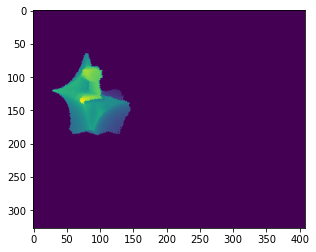

In [12]:
testIM = np.where(snowFiltPrimary.regions == 10, False, True)
test = ps.visualization.show_3D(testIM)
plt.imshow(test)

Text(0.5, 1.0, 'Histogram of all velocities in one region')

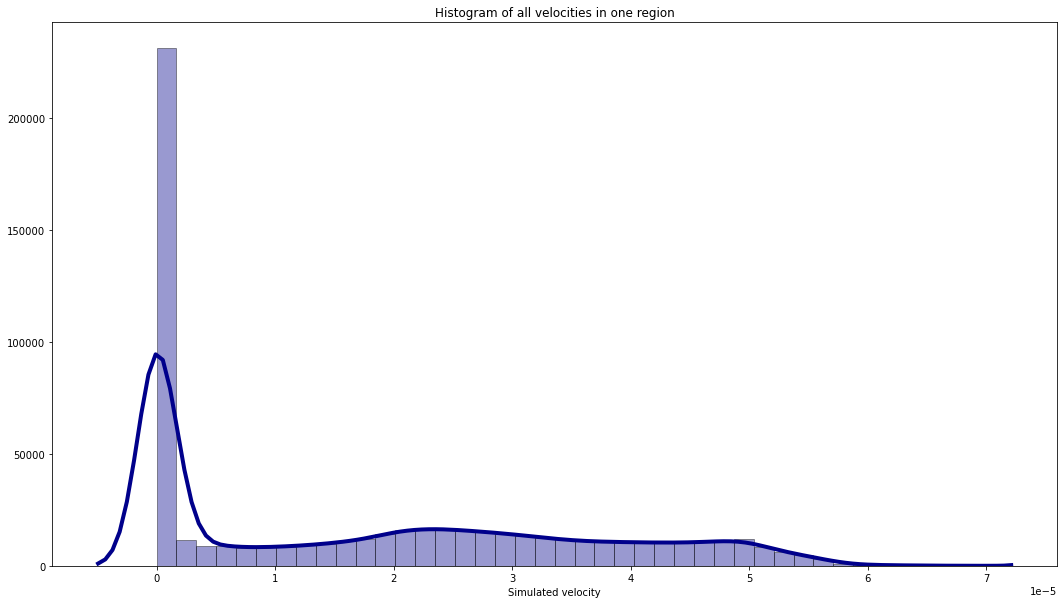

In [15]:
fig, axes = plt.subplots(1, 1, figsize=(18, 10))
sns.distplot(justRegionVel, ax=axes, hist=True, kde=True,
             bins=int(40), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
axes.set_xlabel('Simulated velocity')
axes.set_title('Histogram of all velocities in one region')



# Now try just non zero velocities

Text(0.5, 1.0, 'Histogram of all velocities in one region')

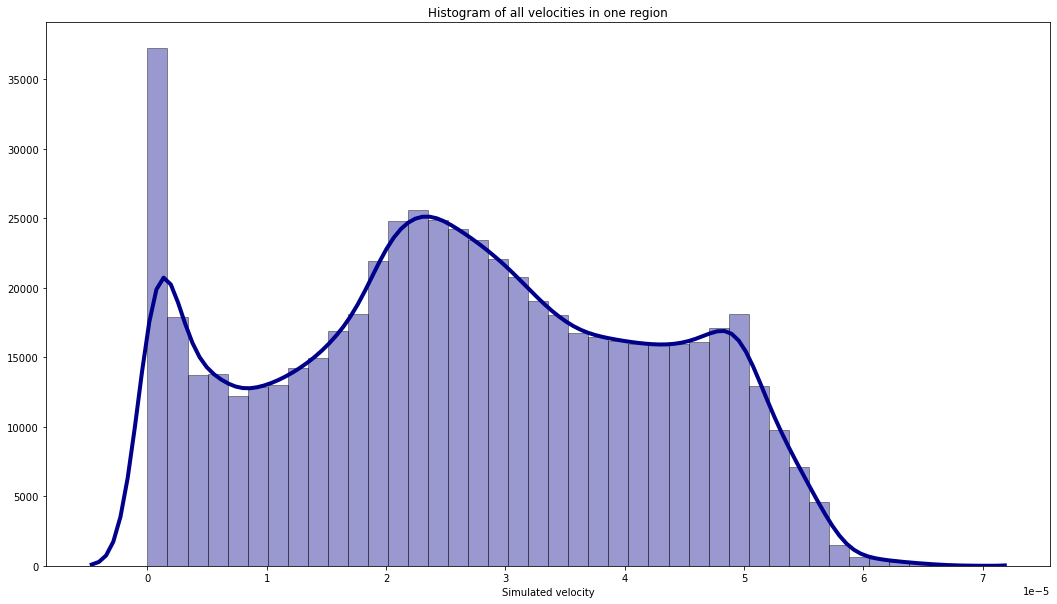

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(18, 10))
sns.distplot(justRegionVel[justRegionVel != 0], ax=axes, hist=True, kde=True,
             bins=int(40), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
axes.set_xlabel('Simulated velocity')
axes.set_title('Histogram of all velocities in one region')



In [10]:
regionData = ps.metrics.regionprops_3D(snowFiltPrimary.regions) #Gives properties for each region

  0%|                                                                                           | 0/93 [00:00<?, ?it/s]

------------------------------------------------------------
Calculating regionprops


100%|██████████████████████████████████████████████████████████████████████████████████| 93/93 [00:35<00:00,  2.65it/s]
